In [3]:
import pandas as pd 
import numpy as np
import random
from math import *
import matplotlib.pyplot as plt

In [16]:
class KMeans:
    def __init__(self, K):
        self.k = K
        
    def __compute_distance(self, first, second):
        return np.sum((first - second) ** 2)
    
    def __mean(self, array):
        return sum(array) / len(array)

    def fit(self, data, iters):
        self.centroids = [data[random.randint(0, data.shape[0] -1), :] for i in range(self.k)]
        for i in range(iters):
            clusters = [[] for i in range(self.k)]
            for point in data:
                distances = [self.__compute_distance(point, centroid) for centroid in self.centroids]
                clusters[distances.index(min(distances))].append(point)
            self.centroids = [self.__mean(cluster) for cluster in clusters]
        self.clusters = [np.array(cluster) for cluster in clusters ]
        return self
          
    def pred(self, data):
        pred_clusters = []
        for point in data:
            distances = [self.__compute_distance(point, centroid) for centroid in self.centroids]
            pred_clusters.append(distances.index(min(distances)))
        return np.array(pred_clusters)
            

<function matplotlib.pyplot.show(close=None, block=None)>

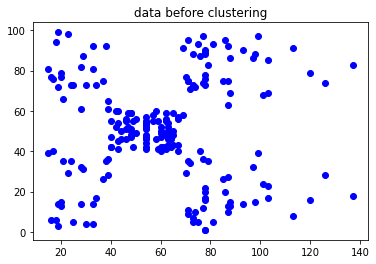

In [17]:
data = pd.read_csv("Clustering_data.txt")
data = data.iloc[:, [3, 4]].values

plt.scatter(data[:,0], data[:,1],color='b')
plt.title('data before clustering')
plt.show


In [18]:
model = KMeans(5)


In [19]:
model.fit(data, 10)

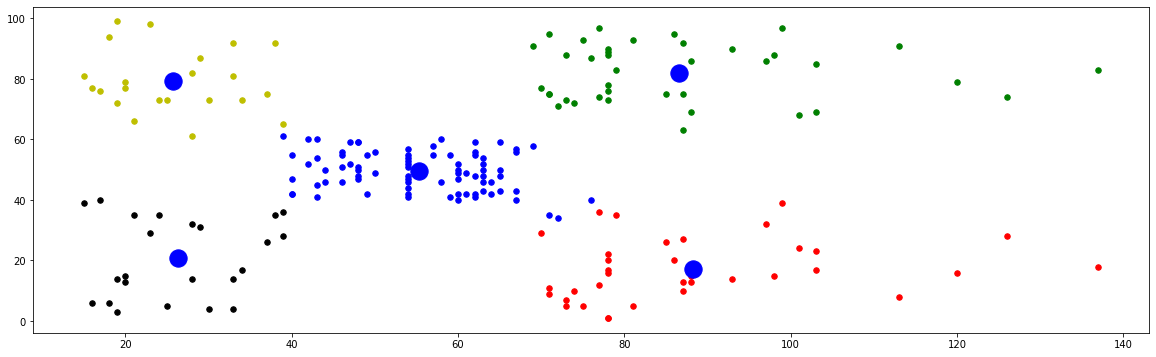

In [20]:
clusters = model.clusters
centroids = model.centroids

fig, axes = plt.subplots(figsize=(20,6))

axes.scatter(clusters[0][:, 0],clusters[0][:, 1], s=30, color='r', label='Cluster 1')
axes.scatter(centroids[0][0],centroids[0][1],s=300, color='b')

axes.scatter(clusters[1][:, 0],clusters[1][:, 1], s=30, color='g', label='Cluster 2')
axes.scatter(centroids[1][0],centroids[1][1],s=300, color='b')

axes.scatter(clusters[2][:, 0],clusters[2][:, 1], s=30, color='b', label='Cluster 3')
axes.scatter(centroids[2][0],centroids[2][1],s=300, color='b')

axes.scatter(clusters[3][:, 0],clusters[3][:, 1], s=30, color='y', label='Cluster 4')
axes.scatter(centroids[3][0],centroids[3][1],s=300, color='b')

axes.scatter(clusters[4][:, 0],clusters[4][:, 1], s=30, color='black', label='Cluster 5')
axes.scatter(centroids[4][0],centroids[4][1],s=300, color='b')

In [22]:
model.pred(data=data).shape

(200,)